In [2]:
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt

Get positions and colors from the data

In [3]:
lat,long,vLOS = [],[],[]

In [4]:
rmag,imag = [],[]

In [5]:
ext_r,ext_i = [],[]

In [6]:
chunk = []

In [7]:
with open("XDQSO_full_data.txt",'r') as infile:
    for line in infile:
        params = line.split()
        lat.append(float(params[1])) # rad
        long.append(float(params[2])) # rad
        vLOS.append(float(params[3])) # km/s
        rmag.append(float(params[4]))
        imag.append(float(params[5]))
        ext_r.append(float(params[7]))
        ext_i.append(float(params[8]))
        chunk.append(float(params[9]))

lat = np.array(lat)
long = np.array(long)
vLOS = np.array(vLOS)
rmag = np.array(rmag)-np.array(ext_r) # extinction corrected psf r magnitude
imag = np.array(imag)-np.array(ext_i) # extinction corrected psf i magnitude
chunk = np.array(chunk)

Plot the locations of the stars:

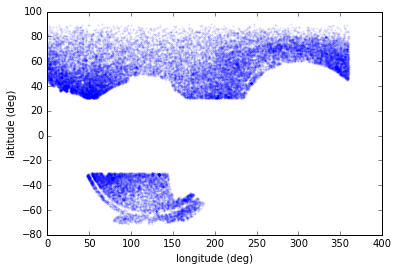

In [18]:
plt.plot(long*180/np.pi,lat*180/np.pi,'b.',alpha=0.1,markersize=3)
plt.xlabel("longitude (deg)")
plt.ylabel("latitude (deg)")

Calculate velocities in the galactocentric rest frame coordinate system: x direction points from the sun to the galactic center, z direction points north, and use right handed coordinates

In [9]:
# from arXiv:0912.3693 (velocity of sun wrt LSR):
u = 11.1 # positive x direction
v = 12.24 # positive y direction
w = 7.5 # positive z direction

vsun = 220.0 # positive y direction

vrf = ( vLOS + vsun*np.sin(long)*np.cos(lat) + u*np.cos(long)*np.cos(lat) + v*np.sin(long)*np.cos(lat) + w*np.sin(lat) )

Calculate the absolute magnitude from the r and i band colors using the bright normalization from http://iopscience.iop.org/article/10.1086/523619/pdf eqn. 1

In [10]:
Mr = ( 4.0 + 11.86*(rmag - imag) - 10.74*(rmag - imag)**2.0 + 5.99*(rmag - imag)**3.0 - 1.20*(rmag - imag)**4.0 )

It looks like come magnitudes are not correct.  We'll deal with this later.  For now, set Mr = 0 instead.

In [11]:
for i in range(len(Mr)):
    if Mr[i] < 0:
        Mr[i] = np.nan

Calculate the distance using eqn. 9 from http://iopscience.iop.org/article/10.1086/523619/pdf

In [12]:
dists = (10.0**( ((rmag-Mr)/5.0 )+ 1.0)) * 0.001 # distance in kpc

Calculate directions and positions to each star

In [13]:
pos = np.zeros((len(dists),3))

for i in range(len(dists)):
    pos[i,0] = dists[i]*np.cos(lat[i])*np.cos(long[i])
    pos[i,1] = dists[i]*np.cos(lat[i])*np.sin(long[i])
    pos[i,2] = dists[i]*np.sin(lat[i])